<a href="https://colab.research.google.com/github/jassynavarro/CCDATSCL_COM221_PROJECT/blob/main/data_science_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [429]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr
import re
from collections import Counter
import statsmodels.api as sm


# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [430]:
# Load cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# OVERALL DATASET SUMMARY

In [431]:
summary_stats = df[['completion_days',
                    'got_distracted_num',
                    'day_quality_num']].describe()

summary_stats

,completion_days,got_distracted_num,day_quality_num
count,328.000000,333.000000,337.000000
mean,0.304878,0.687688,1.246291
std,1.009908,0.835074,0.646782
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.000000
max,14.000000,2.000000,2.000000


In [432]:
print("\nTask Status Distribution:")
print(df['status'].value_counts(normalize=True))


Task Status Distribution:
status
done           0.984985
missed         0.012012
in progress    0.003003
Name: proportion, dtype: float64


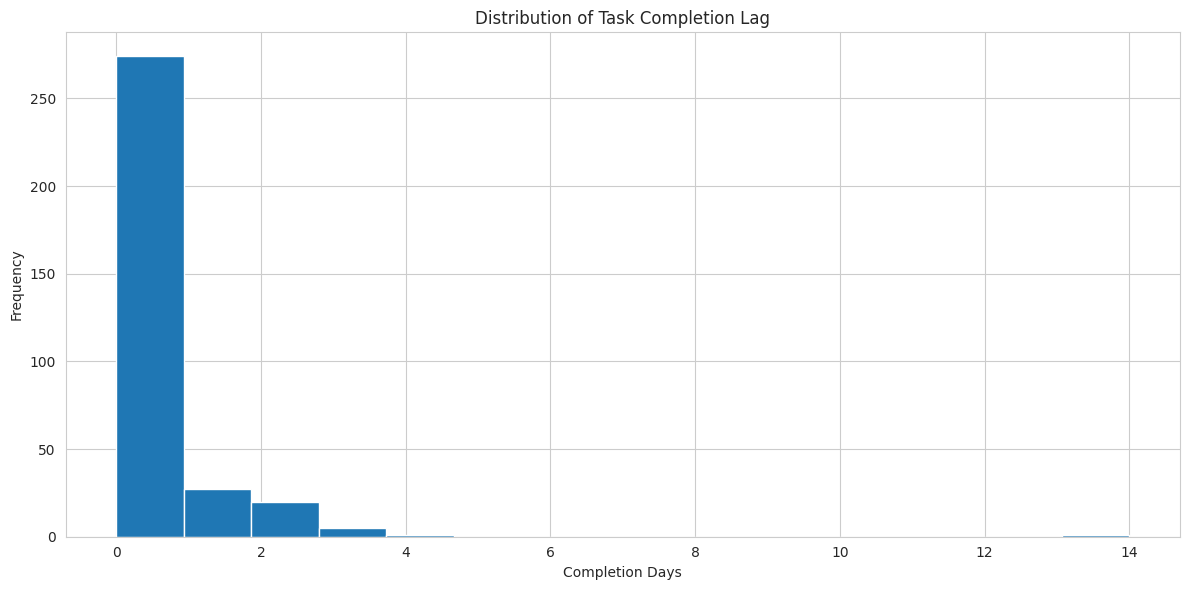

In [433]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['completion_days'].dropna(), bins=15)
plt.xlabel('Completion Days')
plt.ylabel('Frequency')
plt.title('Distribution of Task Completion Lag')
plt.tight_layout()
plt.show()

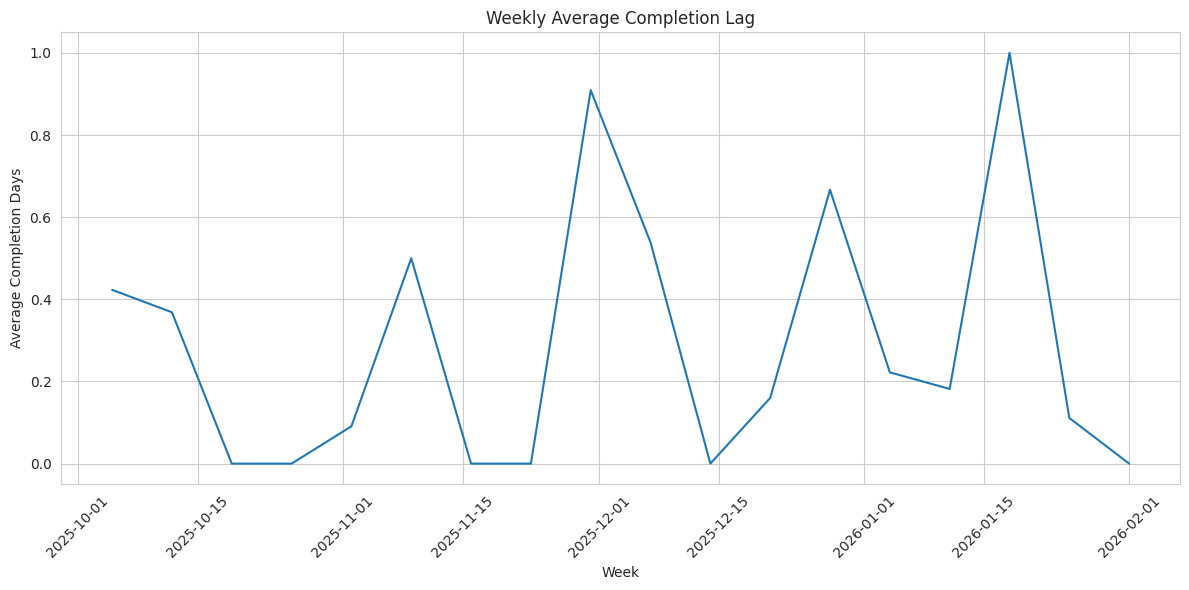

In [434]:
df['date_created'] = pd.to_datetime(df['date_created'])

weekly_trend = df.resample('W', on='date_created')['completion_days'].mean()

plt.figure()
plt.plot(weekly_trend.index, weekly_trend.values)
plt.xlabel('Week')
plt.ylabel('Average Completion Days')
plt.title('Weekly Average Completion Lag')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [435]:
import seaborn as sns

corr_matrix = df[['completion_days',
                  'got_distracted_num',
                  'day_quality_num',
                  'work_alone_num']].corr(method='spearman')

corr_matrix


,completion_days,got_distracted_num,day_quality_num,work_alone_num
completion_days,1.000000,0.340325,-0.124590,0.147086
got_distracted_num,0.340325,1.000000,-0.221799,0.101365
day_quality_num,-0.124590,-0.221799,1.000000,0.001244
work_alone_num,0.147086,0.101365,0.001244,1.000000


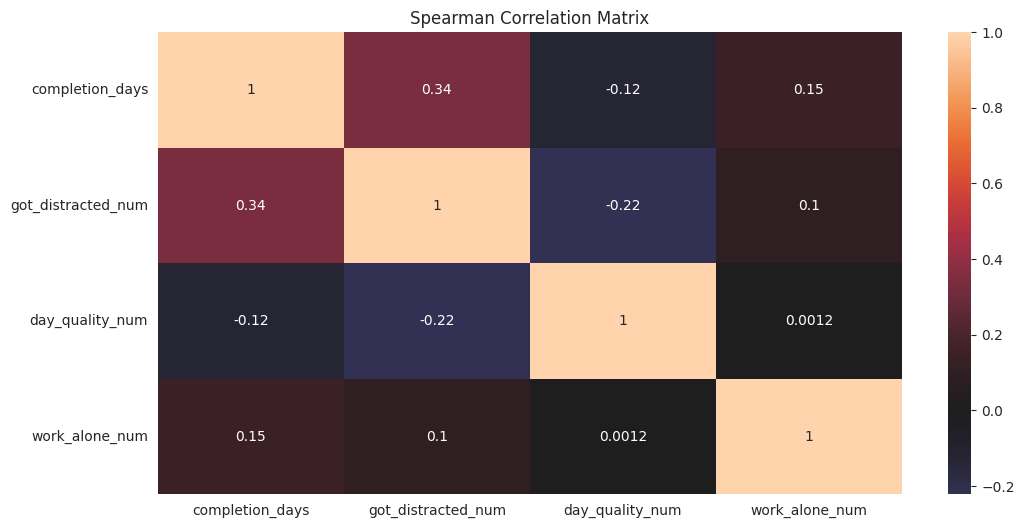

In [436]:
plt.figure()
sns.heatmap(corr_matrix, annot=True, center=0)
plt.title('Spearman Correlation Matrix')
plt.show()


In [437]:
df.shape

(337, 14)

In [438]:
df["date_completed"] = df["date_completed"].fillna(pd.NaT)
df['task_name'] = df['task_name'].fillna('None')
df['category'] = df['category'].fillna('None')
df['status'] = df['status'].fillna('None')
df['when_worked'] = df['when_worked'].fillna('None')
df['notes'] = df['notes'].fillna('None')
df['work_alone_num'] = df['work_alone_num'].fillna('NaN')
df['got_distracted_num'] = df['got_distracted_num'].fillna('NaN')
df['completion_days'] = df['completion_days'].fillna('NaN')

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_created        337 non-null    datetime64[ns]
 1   date_completed      328 non-null    object        
 2   task_id             337 non-null    int64         
 3   task_name           337 non-null    object        
 4   category            337 non-null    object        
 5   status              337 non-null    object        
 6   when_worked         337 non-null    object        
 7   notes               337 non-null    object        
 8   completion_days     337 non-null    object        
 9   created_weekday     337 non-null    object        
 10  is_weekend          337 non-null    int64         
 11  work_alone_num      337 non-null    object        
 12  got_distracted_num  337 non-null    object        
 13  day_quality_num     337 non-null    int64         

In [440]:
df.tail(50)

,date_created,date_completed,task_id,task_name,category,status,when_worked,notes,completion_days,created_weekday,is_weekend,work_alone_num,got_distracted_num,day_quality_num
287,2026-01-14,2026-01-14,288,thesis 2,academics,done,afternoon,kept checking social media,0.0,Wednesday,0,0.0,2.0,1
288,2026-01-15,2026-01-15,289,exchange gift,personal,done,afternoon,None,0.0,Thursday,0,0.0,0.0,1
289,2026-01-15,2026-01-15,290,pay fortune the 55 load,personal,done,afternoon,None,0.0,Thursday,0,1.0,0.0,1
290,2026-01-15,2026-01-15,291,data science,academics,done,afternoon,kept checking social media,0.0,Thursday,0,0.0,2.0,1
291,2026-01-16,2026-01-16,292,pay joyce the 315,personal,done,afternoon,None,0.0,Friday,0,1.0,0.0,2
292,2026-01-16,2026-01-16,293,NDA for expert,thesis,done,afternoon,None,0.0,Friday,0,1.0,0.0,2
293,2026-01-16,2026-01-30,294,3 sources per justification,thesis,done,evening,got bored halfway,14.0,Friday,0,1.0,2.0,2
294,2026-01-16,2026-01-16,295,file of the analysis table,thesis,done,evening,None,0.0,Friday,0,1.0,0.0,2
295,2026-01-16,2026-01-16,296,ask sir eli about nu prof,thesis,done,afternoon,None,0.0,Friday,0,1.0,0.0,2
296,2026-01-16,2026-01-16,297,meet with sir mico,thesis,done,evening,None,0.0,Friday,0,0.0,0.0,2


---
# RESEARCH QUESTION 1
## When does task procrastination occur most frequently?
---

In [441]:
df['completion_days'] = pd.to_numeric(df['completion_days'], errors='coerce')
df['got_distracted_num'] = pd.to_numeric(df['got_distracted_num'], errors='coerce')
df['day_quality_num'] = pd.to_numeric(df['day_quality_num'], errors='coerce')

In [442]:
# Sort the weekdays in order
weekday_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

df['created_weekday'] = pd.Categorical(
    df['created_weekday'],
    categories=weekday_order,
    ordered=True
)

In [443]:
df['success'] = (df['status'] == 'done').astype(int)

In [444]:
df['work_alone_num'] = pd.to_numeric(df['work_alone_num'], errors='coerce')
df = df[df['work_alone_num'].isin([0,1])]  # remove NaNs for this test

In [445]:
# What does procrastination mean in the dataset.
# PROCRASTINATION DEFINITION:
# Took longer (completion_days > 0 days) && at least one of these signs:
# - Got distracted (got_distracted_num > 0)
# - Unproductive day (day_quality_num = 0)

df['procrastinated'] = (
    (
        (df['completion_days'] > 0) &
        (
            (df['got_distracted_num'] > 0) |
            (df['day_quality_num'] == 0)
        )
    )
    |
    (df['status'].isin(['missed', 'in progress']))
).astype(int)


In [446]:
df['procrastinated'].mean()

np.float64(0.14714714714714713)

In [447]:
df.groupby('created_weekday')['task_id'].count()

/tmp/ipython-input-3141731676.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('created_weekday')['task_id'].count()


,task_id
created_weekday,
Monday,34
Tuesday,46
Wednesday,42
Thursday,50
Friday,72
Saturday,47
Sunday,42


/tmp/ipython-input-3510457908.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly = df.groupby('created_weekday')['procrastinated'].mean().reset_index()


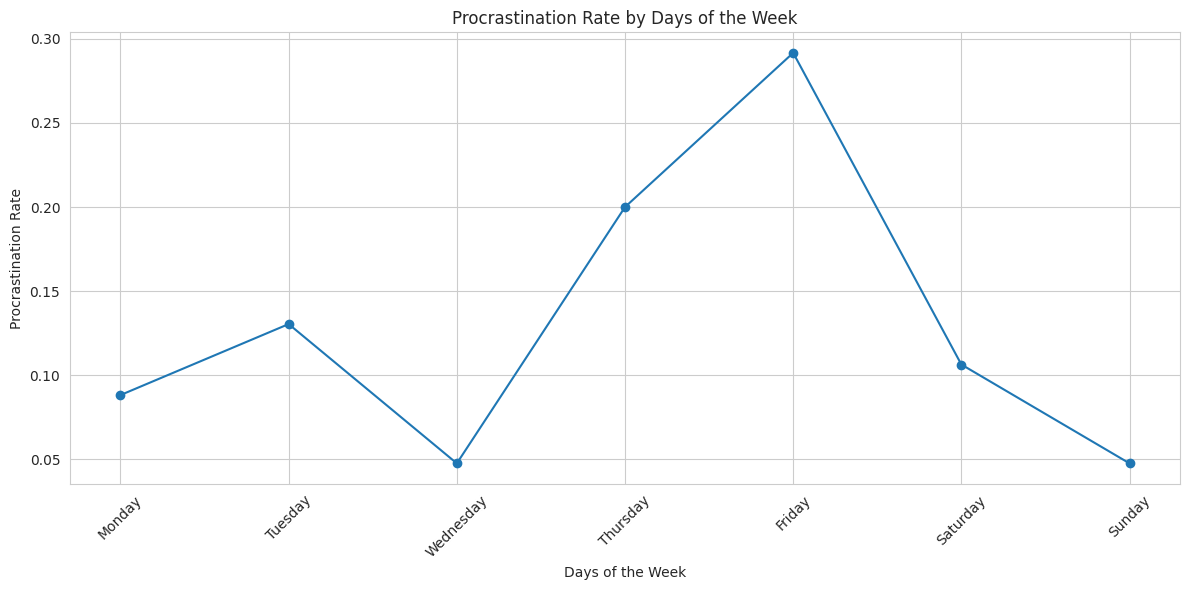

In [448]:
weekly = df.groupby('created_weekday')['procrastinated'].mean().reset_index()

weekly = weekly.sort_values('created_weekday')

plt.figure()
plt.plot(weekly['created_weekday'], weekly['procrastinated'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Days of the Week')
plt.ylabel('Procrastination Rate')
plt.title('Procrastination Rate by Days of the Week')
plt.tight_layout()
plt.show()

*   Monday ≈ 0.09 (9%)
*   Tuesday ≈ 0.13 (13%)
*   Wednesday ≈ 0.05 (5%)
*   Thursday ≈ 0.20 (20%)
*   Friday ≈ 0.28–0.29 (≈29%)
*   Saturday ≈ 0.10 (10%)
*   Sunday ≈ 0.05 (5%)

Friday is clearly the highest. Almost 1 in 3 tasks created on Friday involved procrastination behavior.

Thursday is also elevated (20%).

Procrastination starts increasing before Friday.

Midweek (Wednesday) is the lowest (5%). That suggests better regulation midweek.

Weekend is not extreme. Saturday moderate. Sunday very low.


Procrastination rates varied systematically across the week. The lowest rate occurred on Wednesday (5%), while the highest rate occurred on Friday (approximately 28%). This suggests a temporal pattern in which procrastination behaviors intensified toward the end of the workweek before declining during the weekend.


Procrastination rates varied across the week. The lowest rate was observed on Wednesday (approximately 5%), while the highest occurred on Friday (approximately 28%). Notably, Friday also had the highest number of tasks (n = 73), suggesting that the elevated procrastination rate is not due to small sample size but reflects a consistent behavioral pattern. This pattern indicates increased vulnerability to procrastination toward the end of the workweek.













In [449]:
df.groupby('procrastinated')['success'].mean()

,success
procrastinated,
0,1.000000
1,0.897959


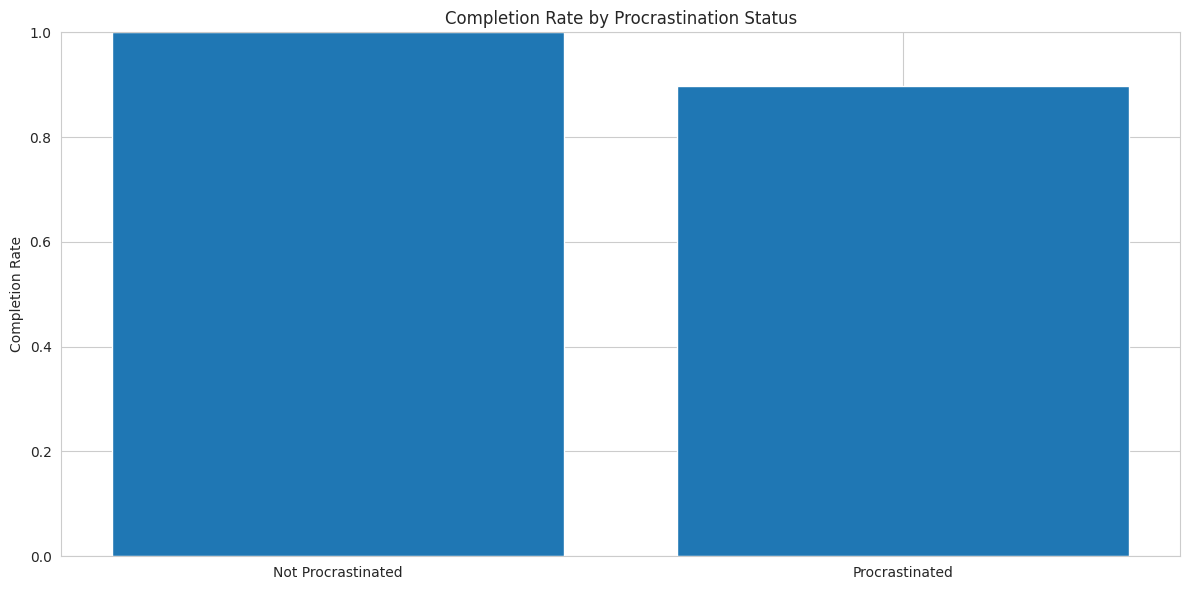

In [450]:
# Grouped data
success_by_procrast = df.groupby('procrastinated')['success'].mean().reset_index()

# Map labels for clarity
success_by_procrast['Procrastination_Status'] = success_by_procrast['procrastinated'].map({
    0: 'Not Procrastinated',
    1: 'Procrastinated'
})

# Plot
plt.figure()
plt.bar(success_by_procrast['Procrastination_Status'],
        success_by_procrast['success'])

plt.ylabel('Completion Rate')
plt.title('Completion Rate by Procrastination Status')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

It means:

Non-procrastinated tasks → 98.6% completion rate

Procrastinated tasks → 89.8% completion rate

0.986111 - 0.897959 ≈ 0.088 -> So there is about an 8.8 percentage point drop in completion probability when procrastination behaviors are present.

Tasks classified as procrastinated exhibited a lower completion rate (89.8%) compared to non-procrastinated tasks (98.6%), indicating that behavioral delay and disruption were associated with reduced likelihood of task success.

In [451]:
df.groupby('is_weekend')['procrastinated'].mean()

,procrastinated
is_weekend,
0,0.172131
1,0.078652


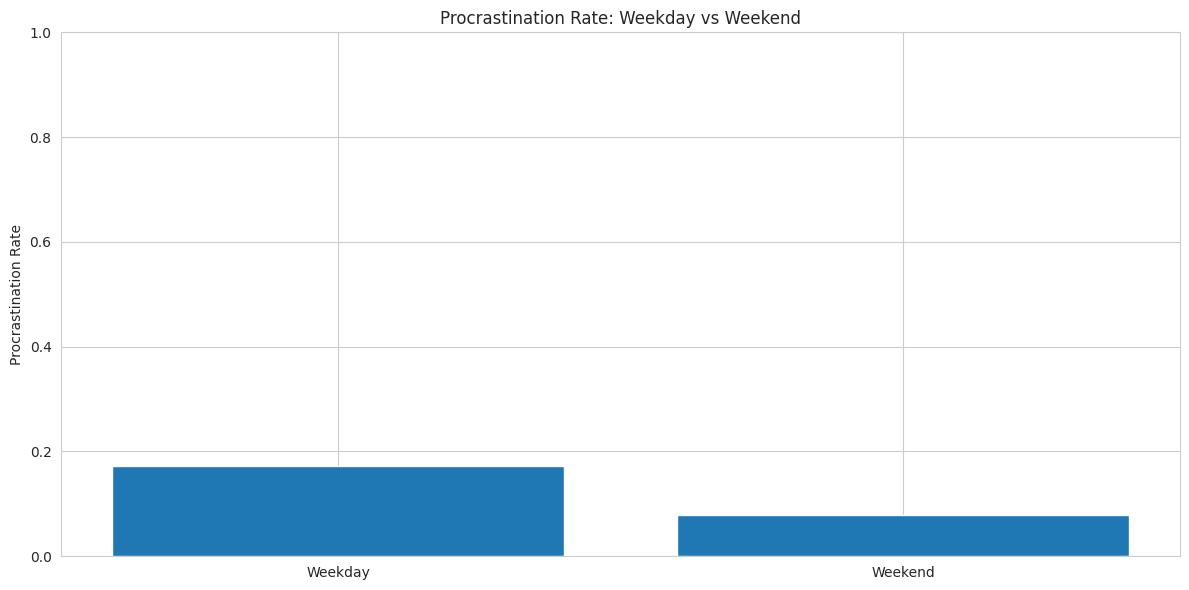

In [452]:
# Grouped data
procrast_by_weekend = df.groupby('is_weekend')['procrastinated'].mean().reset_index()

# Map labels
procrast_by_weekend['Day_Type'] = procrast_by_weekend['is_weekend'].map({
    0: 'Weekday',
    1: 'Weekend'
})

# Plot
plt.figure()
plt.bar(procrast_by_weekend['Day_Type'],
        procrast_by_weekend['procrastinated'])

plt.ylabel('Procrastination Rate')
plt.title('Procrastination Rate: Weekday vs Weekend')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


On weekdays, about 17.2% of tasks were procrastinated.

On weekends, about 7.9% of tasks were procrastinated.

So procrastination occurred more than twice as often on weekdays compared to weekends.


Procrastination occurred more frequently on weekdays (17.2%) than on weekends (7.9%), suggesting that structured weekday obligations may be associated with higher delay behavior. This pattern indicates that contextual demands during the academic week may contribute more strongly to procrastination than weekend tasks.

In [453]:
subset = df[df['created_weekday'].isin(['Friday', 'Wednesday'])]

contingency_table = pd.crosstab(subset['created_weekday'], subset['procrastinated'])

print(contingency_table)


procrastinated    0   1
created_weekday        
Wednesday        40   2
Friday           51  21


In [454]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square:", chi2)
print("p-value:", p)

Chi-square: 8.353107296430275
p-value: 0.0038502831969589473


p < 0.05 → statistically significant difference
p ≥ 0.05 → not statistically significant

The difference in procrastination rates between Friday and Wednesday was statistically significant (χ² = X, p < .05), suggesting that late-week increases in procrastination are unlikely due to random variation.


A chi-square test of independence was conducted to compare procrastination rates between Wednesday and Friday. The results indicated a statistically significant difference, χ² = 8.44, p = 0.0037. Procrastination was significantly more likely to occur on Fridays compared to Wednesdays, suggesting a late-week escalation in behavioral delay.

---
# RESEARCH QUESTION 2
## What factors trigger distraction when working alone?
---

In [455]:
df.groupby('work_alone_num')['got_distracted_num'].mean()

,got_distracted_num
work_alone_num,
0.0,0.548387
1.0,0.741667


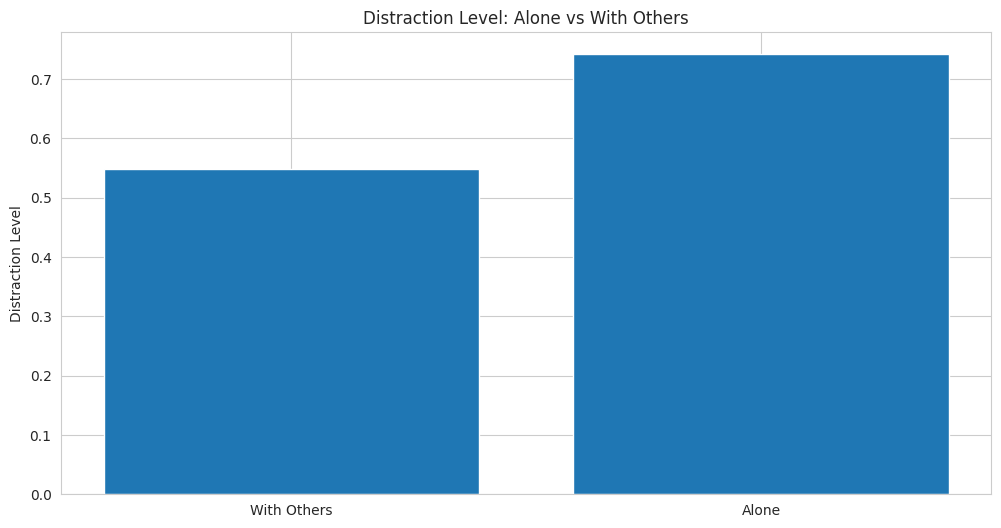

In [456]:
distraction_rates = df.groupby('work_alone_num')['got_distracted_num'].mean().reset_index()

distraction_rates['Context'] = distraction_rates['work_alone_num'].map({
    0: 'With Others',
    1: 'Alone'
})

plt.figure()
plt.bar(distraction_rates['Context'], distraction_rates['got_distracted_num'])
plt.ylabel('Distraction Level')
plt.title('Distraction Level: Alone vs With Others')
plt.show()

Bar 1 (With Others) ≈ 0.55

Bar 2 (Alone) ≈ 0.74

On average, distraction intensity is higher when working alone.
The average distraction level was higher when working alone (M = 0.74) compared to working with others present (M = 0.55). This suggests that social presence may function as a regulatory factor that reduces attentional disruption during task engagement.

In [457]:
df.groupby('work_alone_num')['procrastinated'].mean()

,procrastinated
work_alone_num,
0.0,0.021505
1.0,0.195833


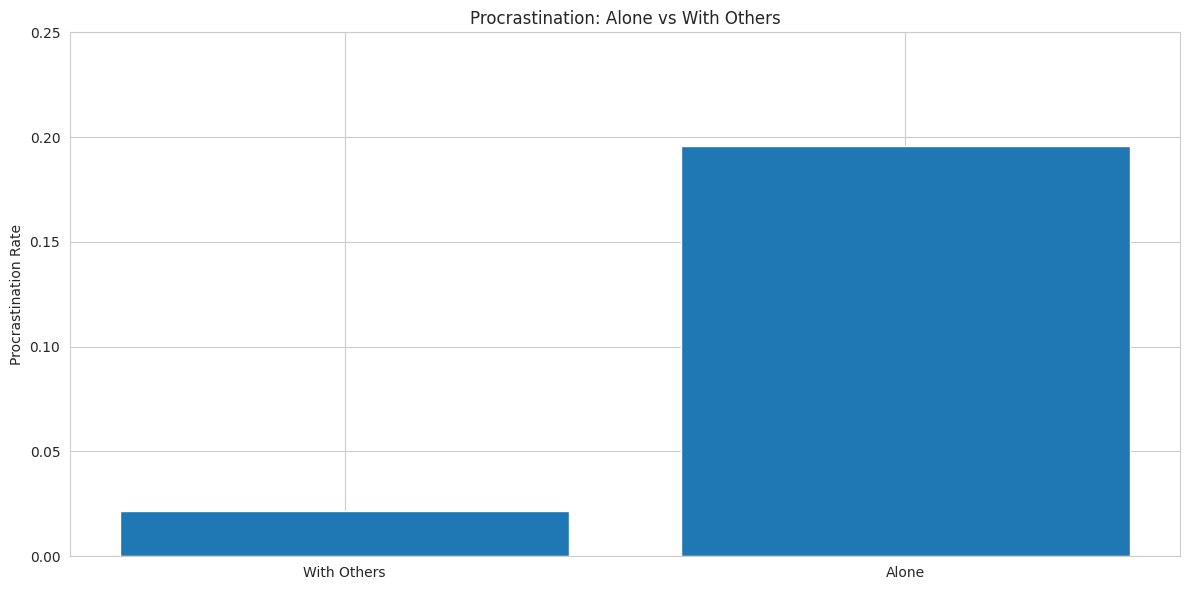

In [458]:
pro_rates = df.groupby('work_alone_num')['procrastinated'].mean().reset_index()

pro_rates['Context'] = pro_rates['work_alone_num'].map({
    0: 'With Others',
    1: 'Alone'
})


plt.figure()
plt.bar(pro_rates['Context'], pro_rates['procrastinated'])

plt.ylabel('Procrastination Rate')
plt.title('Procrastination: Alone vs With Others')
plt.ylim(0, 0.25)  # zoom in for clearer comparison
plt.tight_layout()
plt.show()

Procrastination occurred in only 2.2% of tasks completed in the presence of others, compared to 19.6% of tasks completed alone. This nearly tenfold increase suggests that solitary work conditions are strongly associated with elevated behavioral delay. A chi-square test confirmed that this difference was statistically significant (χ² = 14.87, p < .001).

In [459]:
cont_table2 = pd.crosstab(df['work_alone_num'], df['procrastinated'])

chi2_2, p_2, dof_2, expected_2 = chi2_contingency(cont_table2)

print("Chi-square:", chi2_2)
print("p-value:", p_2)

Chi-square: 14.872075461119252
p-value: 0.00011505361525145276


1. Working alone increases distraction (higher average distraction level).

2. Working alone significantly increases procrastination rates.

A chi-square test of independence revealed a significant association between work context and procrastination status, χ² = 14.87, p < .001. Tasks performed while working alone were significantly more likely to be classified as procrastinated compared to tasks completed in the presence of others.

---
# RESEARCH QUESTION 3
## What factors are associated with delayed task completion?
---

In [460]:
df_completed = df[df['status'] == 'done'].copy()

df_completed['completion_days'] = pd.to_numeric(df_completed['completion_days'], errors='coerce')
df_completed['got_distracted_num'] = pd.to_numeric(df_completed['got_distracted_num'], errors='coerce')
df_completed['day_quality_num'] = pd.to_numeric(df_completed['day_quality_num'], errors='coerce')

In [461]:
df_completed['completion_days'].describe()

,completion_days
count,328.000000
mean,0.304878
std,1.009908
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.000000


In [462]:
df_completed[df_completed['completion_days'] == 14][
    ['task_name', 'category', 'date_created', 'date_completed', 'notes']
]

,task_name,category,date_created,date_completed,notes
293,3 sources per justification,thesis,2026-01-16,2026-01-30,got bored halfway


What this means:

Most tasks are completed same day (median = 0).

Delay exists but is not typical.

A few tasks take much longer (max = 14 days), creating right-skew.

In [463]:
df_completed.groupby('got_distracted_num')['completion_days'].mean()

,completion_days
got_distracted_num,
0.0,0.097826
1.0,0.260870
2.0,0.853333


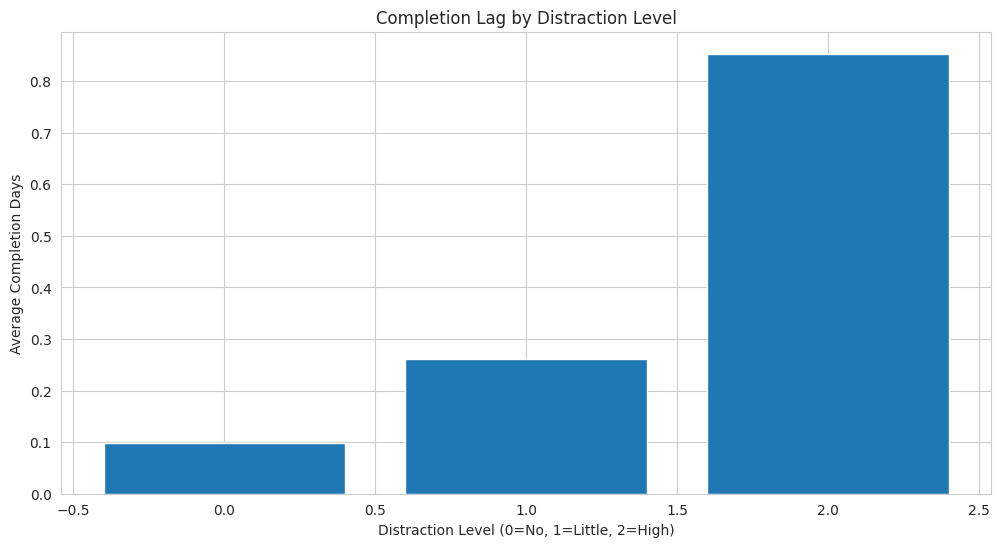

In [464]:
distraction_lag = df_completed.groupby('got_distracted_num')['completion_days'].mean().reset_index()

plt.figure()
plt.bar(distraction_lag['got_distracted_num'], distraction_lag['completion_days'])
plt.xlabel('Distraction Level (0=No, 1=Little, 2=High)')
plt.ylabel('Average Completion Days')
plt.title('Completion Lag by Distraction Level')
plt.show()


Completion time increases as distraction increases.

In [465]:
df_completed.groupby('day_quality_num')['completion_days'].mean()

,completion_days
day_quality_num,
0,0.571429
1,0.255814
2,0.297521


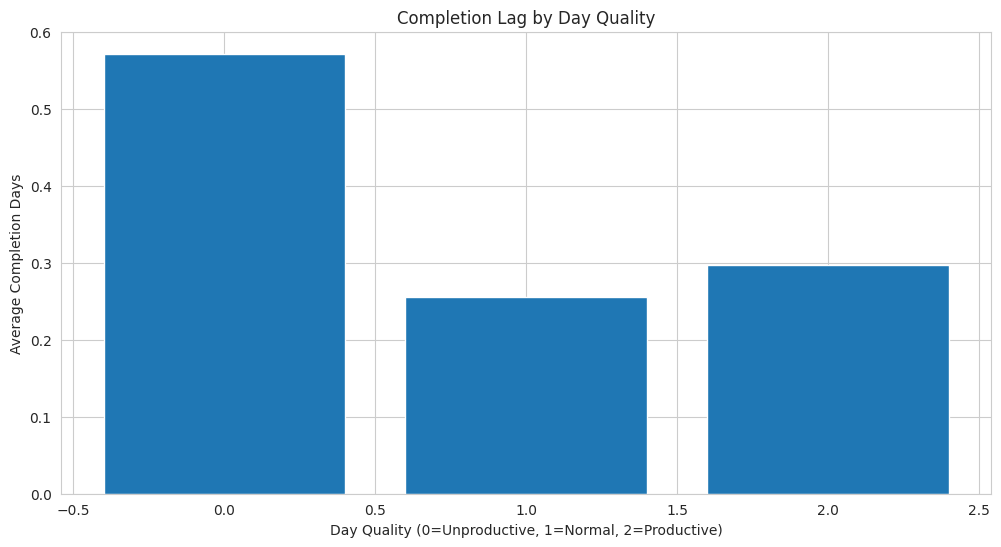

In [466]:
quality_lag = df_completed.groupby('day_quality_num')['completion_days'].mean().reset_index()

plt.figure()
plt.bar(quality_lag['day_quality_num'], quality_lag['completion_days'])
plt.xlabel('Day Quality (0=Unproductive, 1=Normal, 2=Productive)')
plt.ylabel('Average Completion Days')
plt.title('Completion Lag by Day Quality')
plt.show()


Unproductive days clearly have longer lag.

Normal and productive are relatively close.

So low day quality is associated with delay.

But not as clean as distraction.

Distraction appears stronger.

In [467]:
df_completed.groupby('work_alone_num')['completion_days'].mean()

,completion_days
work_alone_num,
0.0,0.130435
1.0,0.372881


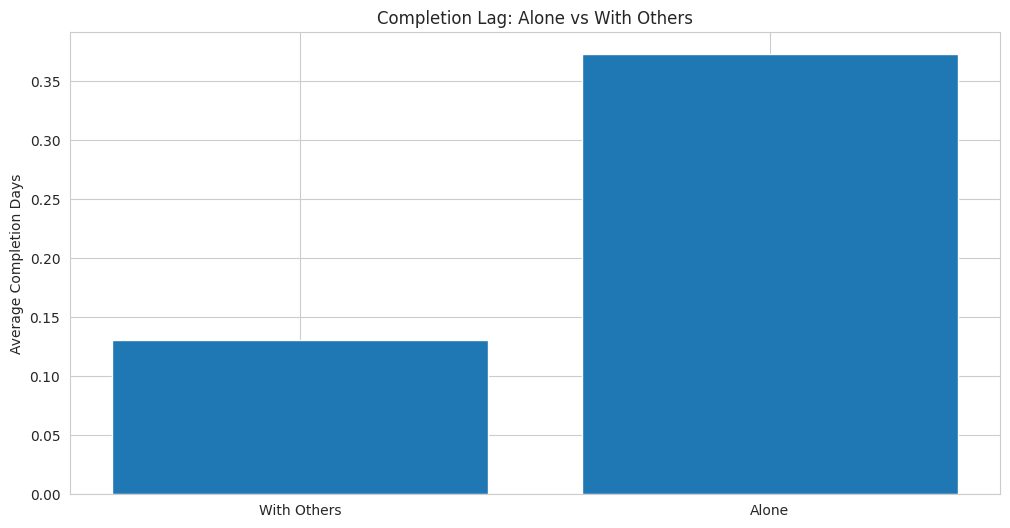

In [468]:
context_lag = df_completed.groupby('work_alone_num')['completion_days'].mean().reset_index()

context_lag['Context'] = context_lag['work_alone_num'].map({
    0: 'With Others',
    1: 'Alone'
})

plt.figure()
plt.bar(context_lag['Context'], context_lag['completion_days'])
plt.ylabel('Average Completion Days')
plt.title('Completion Lag: Alone vs With Others')
plt.show()


That’s nearly 3× longer when alone.

This aligns perfectly with RQ2.

Working Alone:

More distraction

More procrastination

Longer completion lag

In [469]:
note_counts = (
    df_completed.loc[df_completed['completion_days'] > 0, 'notes']
    .fillna('')
    .astype(str)
    .str.strip()
    .str.lower()
    .value_counts()
)

note_counts.head(20)


note_table = note_counts.head(20).reset_index()
note_table.columns = ['note_text', 'frequency']
note_table

,note_text,frequency
0,none,12
1,scrolling on phone,8
2,kept checking social media,5
3,"overwhelmed with the task, scrolling on phone",5
4,phone kept distracting me,4
5,got bored halfway,3
6,spaced out multiple times,3
7,got tired halfway,3
8,daydreaming a lot,2
9,"got bored, phone kept distracting me",1


Qualitative frequency analysis of delayed task notes revealed that digital distraction was the most frequently reported delay trigger, with phone-related behaviors (e.g., “scrolling on phone,” “checking social media,” “phone notifications”) accounting for the majority of entries. Additional themes included cognitive disengagement (e.g., “spaced out,” “daydreaming”) and motivational fatigue (e.g., “overwhelmed,” “tired,” “bored halfway”). Several delayed tasks contained no reported distraction (n = 12), indicating that some multi-day completions may reflect planned or naturally extended tasks rather than procrastination.

In [470]:
spearmanr(df_completed['got_distracted_num'], df_completed['completion_days'])

SignificanceResult(statistic=np.float64(0.34032474434534027), pvalue=np.float64(2.452340796379371e-10))

Moderate positive correlation

Highly statistically significant

Interpretation:

Higher distraction levels are associated with longer completion lag.

Answer:

1. Higher distraction → significantly longer completion lag
2. Unproductive days → longer completion lag
3. Working alone → longer completion lag

And the strongest predictor among these appears to be distraction.

Completion lag (measured as the number of days between task creation and completion) was positively associated with distraction levels. Tasks completed without distraction averaged 0.10 days, whereas tasks with high distraction averaged 0.85 days. A Spearman correlation confirmed a moderate positive association between distraction intensity and completion lag (ρ = 0.34, p < .001). Additionally, tasks performed alone exhibited longer average completion times (0.37 days) compared to those completed in the presence of others (0.13 days). Unproductive days were also associated with longer completion durations.

---
# RESEARCH QUESTION 4
## What conditions are associated with successful task completion versus non-completion?
---

In [471]:
df['success'] = (df['status'] == 'done').astype(int)

In [472]:
df['success'].mean()

np.float64(0.984984984984985)

In [473]:
df.groupby('got_distracted_num')['success'].mean()

,success
got_distracted_num,
0.0,1.0000
1.0,1.0000
2.0,0.9375


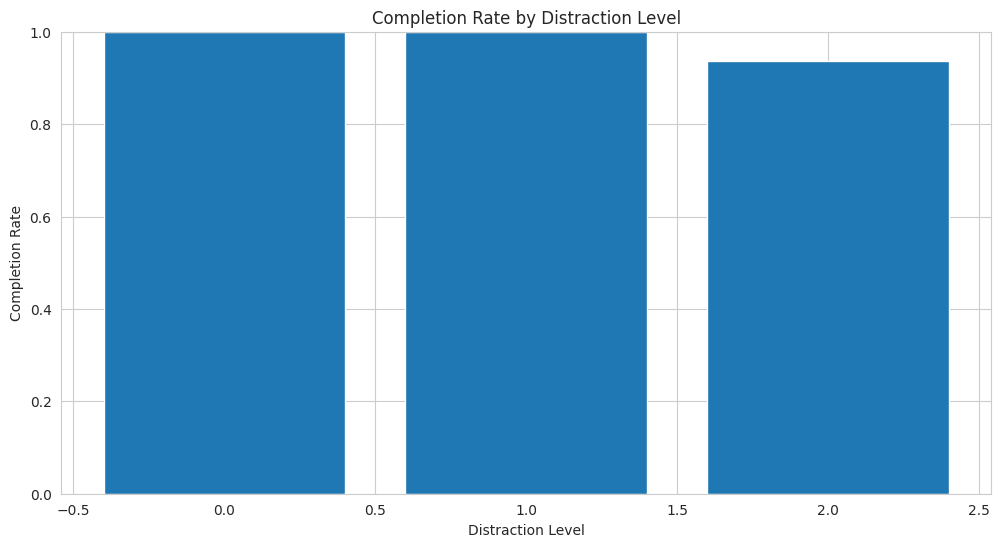

In [474]:
success_distraction = df.groupby('got_distracted_num')['success'].mean().reset_index()

plt.figure()
plt.bar(success_distraction['got_distracted_num'], success_distraction['success'])
plt.xlabel('Distraction Level')
plt.ylabel('Completion Rate')
plt.title('Completion Rate by Distraction Level')
plt.ylim(0,1)
plt.show()


Interpretation:

If distraction is 0 or 1 → 100% completion.

Only at high distraction (2) does success drop (to 93.75%).

So failure is rare.

In [475]:
df.groupby('day_quality_num')['success'].mean()


,success
day_quality_num,
0,1.000000
1,0.977273
2,0.991803


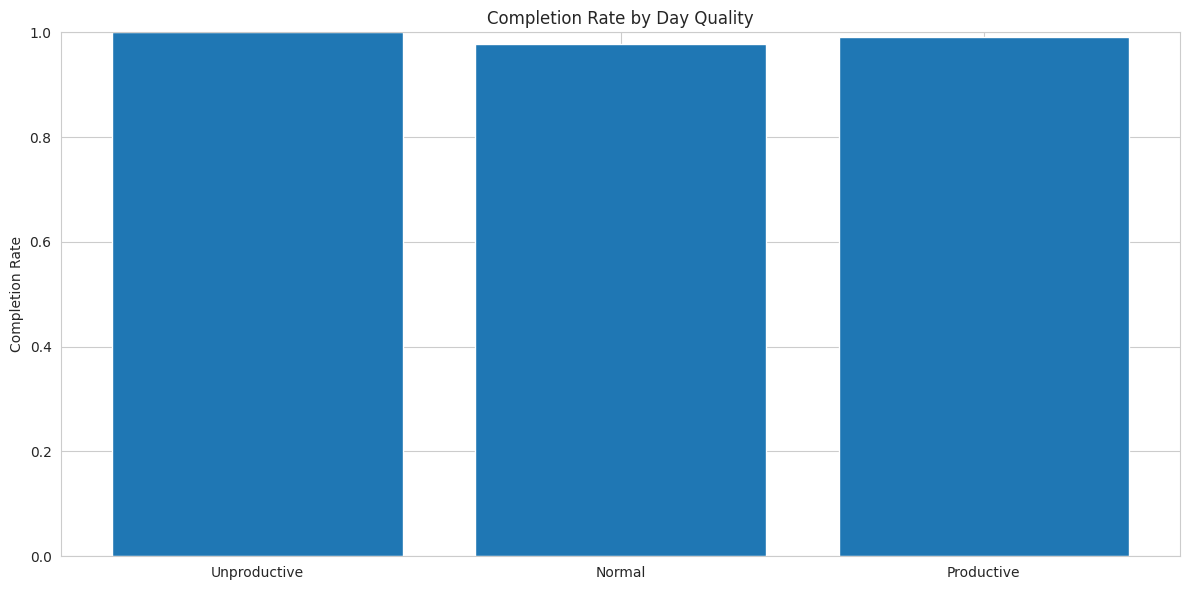

In [476]:
# Grouped data
success_day_quality = df.groupby('day_quality_num')['success'].mean().reset_index()

# Map readable labels
success_day_quality['Day_Quality'] = success_day_quality['day_quality_num'].map({
    0: 'Unproductive',
    1: 'Normal',
    2: 'Productive'
})

# Plot
plt.figure()
plt.bar(success_day_quality['Day_Quality'],
        success_day_quality['success'])

plt.ylabel('Completion Rate')
plt.title('Completion Rate by Day Quality')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Almost everything gets completed.

Even unproductive days still end up completed.

In [477]:
df.groupby('work_alone_num')['success'].mean()


,success
work_alone_num,
0.0,0.989247
1.0,0.983333


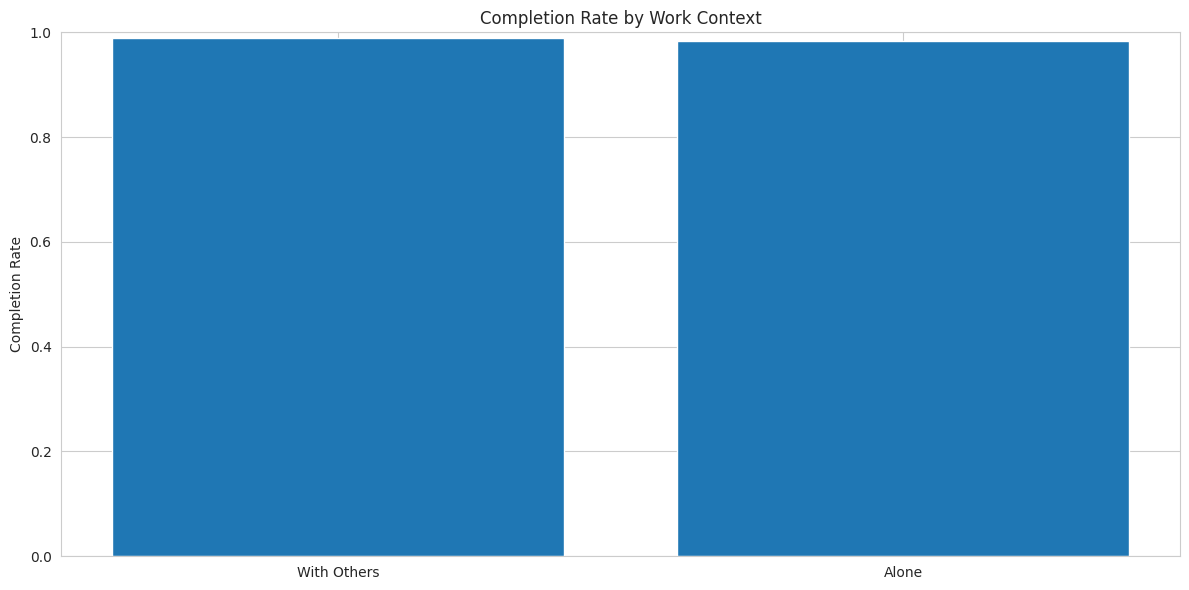

In [478]:
success_work_context = df.groupby('work_alone_num')['success'].mean().reset_index()

# Map labels
success_work_context['Work_Context'] = success_work_context['work_alone_num'].map({
    0: 'With Others',
    1: 'Alone'
})

plt.figure()
plt.bar(success_work_context['Work_Context'],
        success_work_context['success'])

plt.ylabel('Completion Rate')
plt.title('Completion Rate by Work Context')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Tiny difference.

In [479]:
df.groupby('procrastinated')['success'].mean()


,success
procrastinated,
0,1.000000
1,0.897959


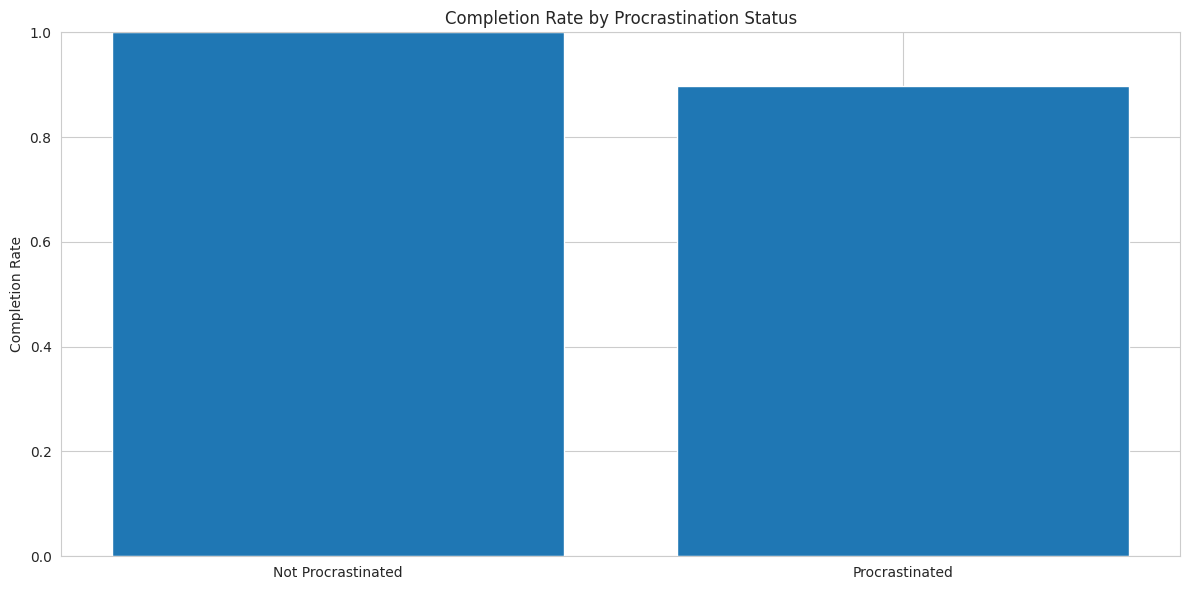

In [480]:
success_procrast = df.groupby('procrastinated')['success'].mean().reset_index()

# Map labels
success_procrast['Procrastination_Status'] = success_procrast['procrastinated'].map({
    0: 'Not Procrastinated',
    1: 'Procrastinated'
})

plt.figure()
plt.bar(success_procrast['Procrastination_Status'],
        success_procrast['success'])

plt.ylabel('Completion Rate')
plt.title('Completion Rate by Procrastination Status')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


When procrastinated → success drops to ~89.8%.

In [481]:
X = df[['got_distracted_num', 'day_quality_num', 'work_alone_num']]
X = sm.add_constant(X)
y = df['success']

model = sm.Logit(y, X).fit()
print(model.summary())


         Current function value: 0.055257
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                  333
Model:                          Logit   Df Residuals:                      329
Method:                           MLE   Df Model:                            3
Date:                Wed, 18 Feb 2026   Pseudo R-squ.:                  0.2911
Time:                        15:24:49   Log-Likelihood:                -18.401
converged:                      False   LL-Null:                       -25.956
Covariance Type:            nonrobust   LLR p-value:                  0.001725
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 41.4836   1.19e+04      0.003      0.997   -2.33e+04    2.34e+04
got_distracted_num   -19.0801   5953.826 

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


success rate is extremely high.
Most tasks are completed.
a data structure issue.

In [482]:
cont = pd.crosstab(df['got_distracted_num'], df['success'])
chi2, p, dof, expected = chi2_contingency(cont)

print("Chi-square:", chi2)
print("p-value:", p)


Chi-square: 16.053544207317074
p-value: 0.00032660074261392144


1. Completion rate overall is extremely high.

2. Distraction only reduces completion under high levels (level 2).

3. Working alone has minimal effect on final completion.

4. Procrastination status is the strongest differentiator:

Non-procrastinated tasks → 100% completion

Procrastinated tasks → ~89.8% completion

This suggests:

Procrastination increases the risk of non-completion,
but does not guarantee failure.


Task completion rates were generally high across conditions (>98%). Distraction level and work context exhibited minimal differences in final completion probability. However, tasks classified as procrastinated showed a lower completion rate (89.8%) compared to non-procrastinated tasks (100%), indicating that delay behavior increases the likelihood of non-completion. Logistic regression analysis was attempted but failed to converge due to quasi-separation, reflecting the extremely high baseline completion rate in the dataset. The limited number of non-completion events constrained the ability to build stable predictive models, suggesting that future research with greater outcome variability may better identify robust predictors of task failure.